# LOGISTIC REGRESSION

STATISTICAL THEORY 

The simple linear regression model is appropriate for relating a quantitative response
variable to a quantitative predictor x.

Now consider 𝑦 as a categorical variable that takes two values, depending on the numerical variable 𝑥. Let $y$ take the vaalues $1$ and $0$ corresponding to $Success$ and $Failure$, respectievely.

Define $p = P(Success) = P(1)$. Then the value of $p$  will depend on the value of some
quantitative variable $x$. 

In Logistic Regression we model some function of mean value of $y$ as a linear function of $\beta_0$ and $\beta_1$
- DEFENITION Logit Function

$$p(x) = \frac{ e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}$$
 
$ Logistic\ regression$ means assuming that $p(x)$ is related to x by the logit function.


Straightforward algebra shows that
$$ \frac{p(x)}{1-p(x)} = e^{\beta_0 + \beta_1 x}$$


If we take $ln$ on both sides $$ ln\{\frac{p(x)}{1-p(x)}\} = \beta_0 + \beta_1 x$$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### QUESTION

The article “Acceptable Noise Levels for Construction Site Offices” (Building Serv. Engr. Res. Tech., 2009:
87–94) analyzed responses from a sample of 77 individuals, each of whom was asked to say whether a particular
noise level (dBA) to which he/she had been exposed was
acceptable or unacceptable. Here is data provided by the
article’s authors:

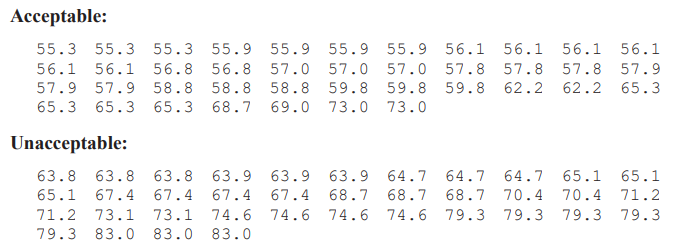

QUESTION

- Fit logistic regression model and interpret the output 
- Sketch a graph of the estimated probability of a noise level being acceptable as a function of the level

### ANSWER

##### Fitting Logistic Regression and Interpreting the Output

#### <FONT COLOR = DARKGREEN> Creating dataframe noice level and acceptance

In [3]:


data = {
    "Noice Level": [55.3 ,55.3, 55.3, 55.9, 55.9, 55.9, 55.9, 56.1, 56.1, 56.1, 56.1,
56.1 ,56.1 ,56.8, 56.8, 57.0, 57.0 ,57.0, 57.8, 57.8, 57.8, 57.9,
57.9, 57.9, 58.8, 58.8, 58.8 ,59.8 ,59.8, 59.8, 62.2, 62.2, 65.3,
65.3, 65.3, 65.3, 68.7, 69.0, 73.0, 73.0,63.8,63.8 ,63.8 ,63.9, 63.9, 63.9, 64.7, 64.7, 64.7, 65.1, 65.1,
65.1, 67.4, 67.4, 67.4, 67.4 ,68.7 ,68.7, 68.7 ,70.4 ,70.4 ,71.2,
71.2, 73.1, 73.1, 74.6, 74.6, 74.6 ,74.6, 79.3, 79.3, 79.3, 79.3,
79.3, 83.0, 83.0, 83.0]
    
}

df = pd.DataFrame(data)

# Create a column with all elements 0
df['Acceptable'] = 0

# Set the first 40 elements of the 'Raw' column to 1 i.e, first 40 noices are acceptable
df.loc[:39, 'Acceptable'] = 1

# The next 37 elements are already set to 0 by default, so no further action is needed

df

,Noice Level,Acceptable
0,55.3,1
1,55.3,1
2,55.3,1
3,55.9,1
4,55.9,1
...,...,...
72,79.3,0
73,79.3,0
74,83.0,0
75,83.0,0


In [14]:
# Preparing the data
X = df[['Noice Level']]
y = df['Acceptable']

# Adding a constant to the predictor variable matrix
# This is done for getting coefficients and analysis of constant term in regression
# By default, statsmodels does not include the intercept in the regression model unless it is explicitly specified.
X_const = sm.add_constant(X)

# Fitting the model using statsmodels
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

# Printing the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.353003
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptable   No. Observations:                   77
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 May 2024   Pseudo R-squ.:                  0.4902
Time:                        11:38:23   Log-Likelihood:                -27.181
converged:                       True   LL-Null:                       -53.314
Covariance Type:            nonrobust   LLR p-value:                 4.849e-13
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          23.0140      5.041      4.565      0.000      13.133      32.895
Noice Level    -0.3562    

In [15]:
# Calculating odds ratios and corresponding 95% confidence intervals
odds_ratios = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = odds_ratios

# Rename the columns for better readability
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
conf

,2.5%,97.5%,Odds Ratio
const,505293.279606,1.932709e+14,9.882230e+09
Noice Level,0.600573,8.166583e-01,7.003307e-01


#### <font color = DarkGreen> Conclusion

Inference regarding coefficients of Noice Level
- From the summary, the coefficient for Noise Level is -0.3562, with an associated P-value of 0.000, indicating high statistical significance. Under the null hypothesis ($H_0$), the coefficient is not significant, whereas the alternative hypothesis ($H_a$) asserts that the coefficient is significant. Given that the P-value is effectively zero, far below any conventional significance level, we reject the null hypothesis. Therefore, we accept the alternative hypothesis ($H_a$), concluding that Noise Level significantly influences the acceptability criteria.
- The negative sign in the coefficient of noice level indicates that  the likelihood of a level being acceptable does decrease as the level
increases. 

Inference Regarding odd ratio of  Noice Level

- The odd ratio of Noice level is 0.700330 this means each 1 dBA increase in noise level, the odds of acceptability decreases by a factor of .70.

#### <FONT COLOR = DARKGREEN> Creating graph of noice acceptance level

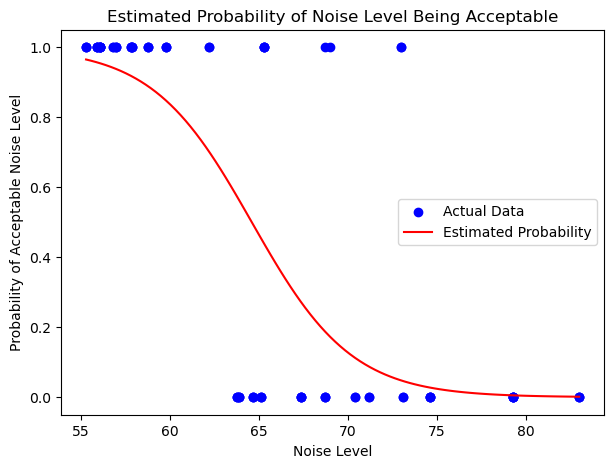

In [21]:
# Define the noise levels for prediction
noise_levels = np.linspace(df['Noice Level'].min(), df['Noice Level'].max(), 100)

# Calculate the estimated probabilities using the logistic regression model
intercept = result.params['const']
slope = result.params['Noice Level']
probabilities = 1 / (1 + np.exp(-(intercept + slope * noise_levels)))

# Plot the graph
plt.figure(figsize=(7, 5))
plt.scatter(df['Noice Level'], df['Acceptable'], color='blue', label='Actual Data')
plt.plot(noise_levels, probabilities, color='red', label='Estimated Probability')
plt.xlabel('Noise Level')
plt.ylabel('Probability of Acceptable Noise Level')
plt.title('Estimated Probability of Noise Level Being Acceptable')
plt.legend()
plt.show()

As noice level increases the probability of acceptance level decreases.

In [10]:
result.conf_int()

,0,1
Noice Level,-0.008278,0.005384


In [13]:
from sklearn.linear_model import LogisticRegression
# Creating a logistic regression model
model = LogisticRegression()

In [14]:
# Preparing the data
X = df[['Noice Level']]
y = df['Acceptable']

In [15]:
# Fitting the model
model.fit(X, y)

LogisticRegression()

In [16]:
# Coefficients and Intercept
intercept = model.intercept_[0]
coefficients = model.coef_[0]

# Displaying coefficients
print("Intercept:", intercept)
print("Coefficient for Noise Level:", coefficients[0])


Intercept: 22.875307978409452
Coefficient for Noise Level: -0.35404056832481423


Accuracy: 0.8181818181818182
Confusion Matrix:
 [[31  6]
 [ 8 32]]
AUC: 0.9118243243243244


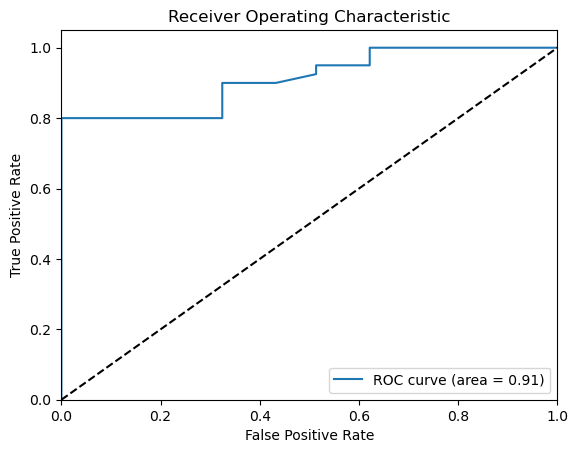

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Predicting on the training data
y_pred = model.predict(X)

# Accuracy
print("Accuracy:", accuracy_score(y, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# ROC Curve and AUC
y_probs = model.predict_proba(X)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y, y_probs)
auc = roc_auc_score(y, y_probs)
print("AUC:", auc)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [22]:

import numpy as np
import matplotlib.pyplot as plt

# Generating a range of noise levels for prediction
x_range = np.linspace(X['Noise Level'].min(), X['Noise Level'].max(), 300).reshape(-1, 1)

# Predicting probabilities for these new values
predicted_probs = model.predict_proba(x_range)[:, 1]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_range, predicted_probs, label='Probability of Acceptable Noise Level')
plt.scatter(X, y, color='red', label='Actual Data Points')  # Actual points for reference
plt.xlabel('Noise Level (dBA)')
plt.ylabel('Probability of Being Acceptable')
plt.title('Probability of Noise Level Being Acceptable')
plt.legend()
plt.show()



KeyError: 'Noise Level'

In [1]:
import pandas as pd
import numpy as np

# Sample data
data = {
    'Test1': [85, 75, 65, 90, 45, 80, 55, 60, 70, 85],
    'Test2': [80, 70, 60, 88, 40, 82, 48, 55, 65, 80],
    'Admitted': [1, 1, 0, 1, 0, 1, 0, 0, 0, 1]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   Test1  Test2  Admitted
0     85     80         1
1     75     70         1
2     65     60         0
3     90     88         1
4     45     40         0
5     80     82         1
6     55     48         0
7     60     55         0
8     70     65         0
9     85     80         1


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preparing the data
X = df[['Test1', 'Test2']]
y = df['Admitted']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a logistic regression model
model = LogisticRegression()

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [3]:
import pandas as pd

# Sample data
data = {
    'Hours_Studied': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 4.5, 5.0, 5.5, 6.0],
    'Passed': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


    Hours_Studied  Passed
0             0.5       0
1             1.0       0
2             1.5       0
3             2.0       0
4             2.5       0
5             3.0       1
6             4.0       1
7             4.5       1
8             5.0       1
9             5.5       1
10            6.0       1


<AxesSubplot:xlabel='Hours_Studied', ylabel='Passed'>

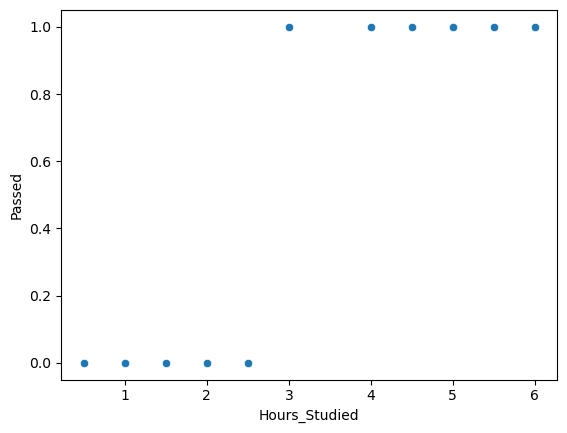

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df , x='Hours_Studied', y='Passed')

In [9]:
X = df[['Hours_Studied']]

In [10]:
y = df[['Passed']]

In [11]:
model.fit(X,y)

C:\Users\sidiq\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Preparing the data
X = df[['Hours_Studied']]  # Independent variable
y = df['Passed']           # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a logistic regression model
model = LogisticRegression()

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating accuracy and displaying classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



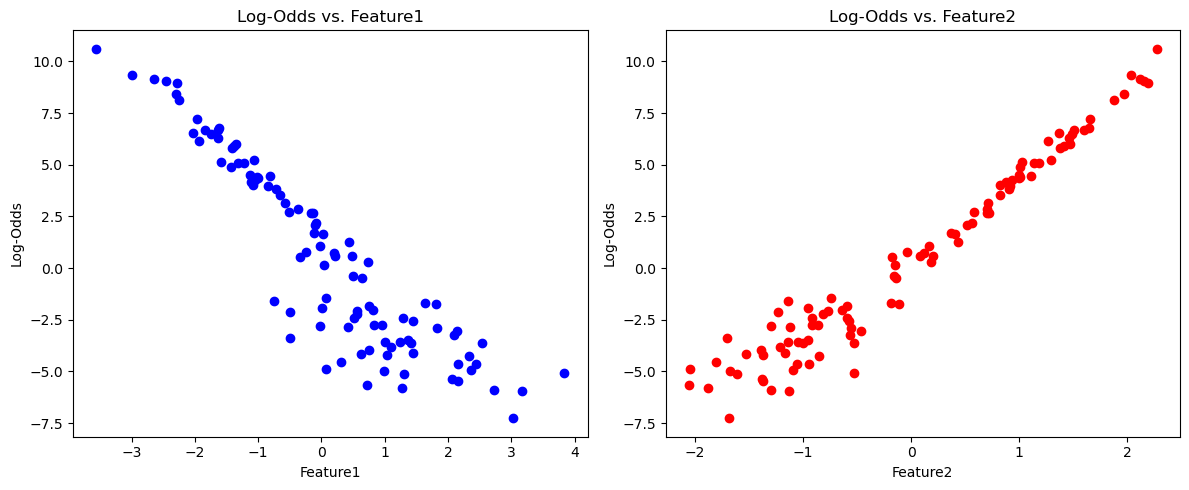

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate a synthetic binary classification dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=7, n_clusters_per_class=1)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

# Fit a logistic regression model
model = LogisticRegression()
model.fit(df[['Feature1', 'Feature2']], df['Target'])

# Predict probabilities
probabilities = model.predict_proba(df[['Feature1', 'Feature2']])[:, 1]

# Calculate log-odds
log_odds = np.log(probabilities / (1 - probabilities))

# Plot log-odds against each feature
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Feature1'], log_odds, color='blue')
plt.title('Log-Odds vs. Feature1')
plt.xlabel('Feature1')
plt.ylabel('Log-Odds')

plt.subplot(1, 2, 2)
plt.scatter(df['Feature2'], log_odds, color='red')
plt.title('Log-Odds vs. Feature2')
plt.xlabel('Feature2')
plt.ylabel('Log-Odds')

plt.tight_layout()
plt.show()


In [ ]:
sns.scatterplot(data=df, )